In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
#from scipy.stats import norm
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve
import matplotlib.pyplot as plt
#%matplotlib inline+
import folium
import json
import urllib.request

url_B = "https://data.brasil.io/dataset/covid19/caso_full.csv.gz"
url_AL = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-27-mun.json"
url_BA = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-29-mun.json"
url_CE = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-23-mun.json"
url_MA = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-21-mun.json"
url_PB = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-25-mun.json"
url_PE = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json"
url_PI = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-22-mun.json"
url_RN = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-24-mun.json"
url_SE = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-28-mun.json"
url_BR = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"

# BR / Brasil - geojson/geojs-100-mun.json
# AL / Alagoas - geojson/geojs-27-mun.json
# BA / Bahia - geojson/geojs-29-mun.json
# CE / Ceará - geojson/geojs-23-mun.json
# MA / Maranhão - geojson/geojs-21-mun.json
# PB / Paraíba - geojson/geojs-25-mun.json
# PE / Pernambuco - geojson/geojs-26-mun.json
# PI / Piauí - geojson/geojs-22-mun.json
# RN / Rio Grande do Norte - geojson/geojs-24-mun.json
# SE / Sergipe - geojson/geojs-28-mun.json

In [2]:
df = pd.read_csv(url_B, sep = ",")
df1 = df.drop(['epidemiological_week', 'last_available_date', 'is_repeated'], axis = 1)
df1.rename(columns={'last_available_confirmed' : 'confirmed', 'last_available_confirmed_per_100k_inhabitants' : 'incidence',
                    'estimated_population_2019' : 'population','last_available_deaths' : 'deaths',
                    'last_available_death_rate' : 'death_rate'}, inplace = True)

In [3]:
req = urllib.request.urlopen(url_BR)
content = req.read().decode('ansi')

geo = json.loads(content)

In [4]:
df_hoje = df1.loc[df['is_last'] == True, :]

label = ["Cidade", "Código IBGE", "Dia", "Último Dado", "Casos Confirmados", "Incidência de Casos", "Mortalidade", "Óbitos Confirmados", "Estado", "Novos Casos", "Novas Mortes"]
color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']

In [5]:
Norte = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
Nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
Sudeste = ['ES', 'MG', 'RJ', 'SP']
Sul = ['PR', 'RS', 'SC']
Centro_oeste = ['DF', 'GO', 'MT', 'MS']

Regiao = [Nordeste, Norte, Sudeste, Sul, Centro_oeste]
reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

In [6]:
FMT = '%Y-%m-%d'

date = df['date']
df1['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days)

In [7]:
df_cidades = df1.loc[df['place_type'].eq('city'), :].drop(['place_type', 'order_for_place'], axis = 1)

df_cidades['region'] = 'null'
for r in range(len(Regiao)) :
    for a in range(len(Regiao[r])) :
        df_cidades.loc[df_cidades['state'].eq(Regiao[r][a]), 'region'] = reg[r]

df_cidades = df_cidades[['city', 'city_ibge_code', 'state', 'region', 'population', 'date',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths', 'is_last']]

In [8]:
df_NE = df_cidades.loc[df_cidades['region'].eq('Nordeste'), :].sort_values('date', ascending = True).reset_index(drop = True)

df_NE = df_NE[['city', 'city_ibge_code', 'state', 'population', 'date',
                         'confirmed', 'deaths', 'new_confirmed', 'new_deaths', 'is_last']]

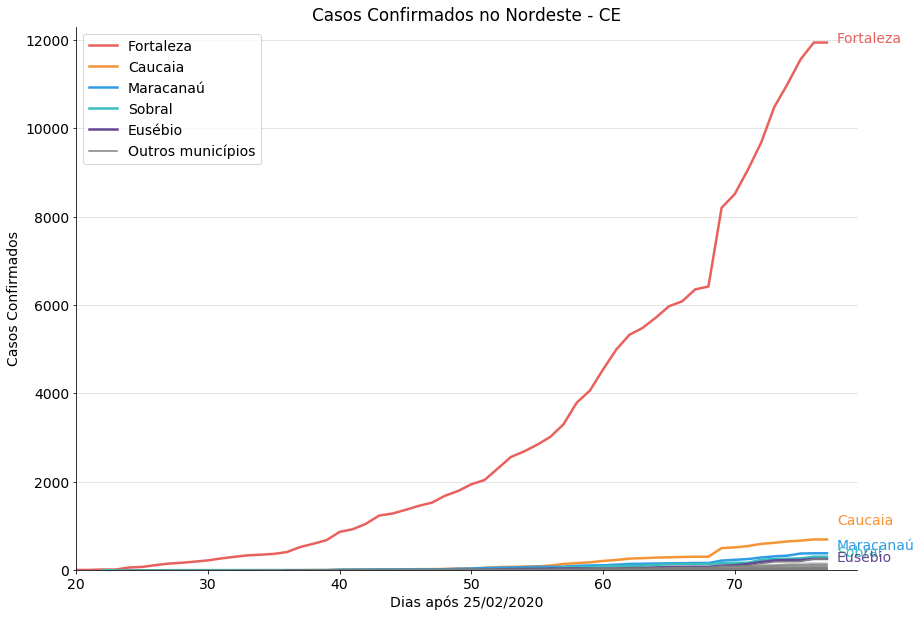

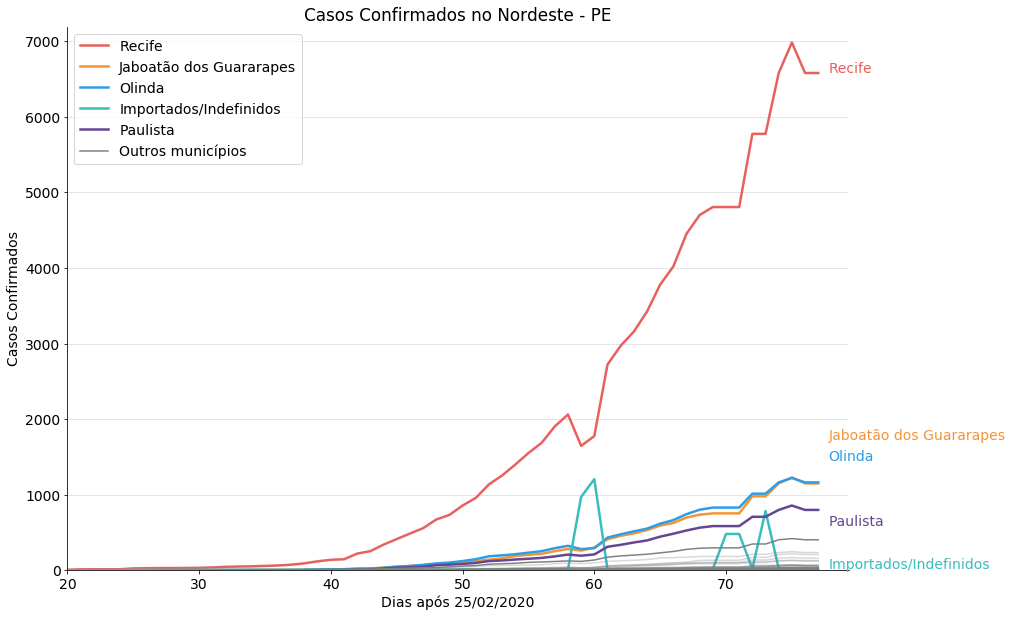

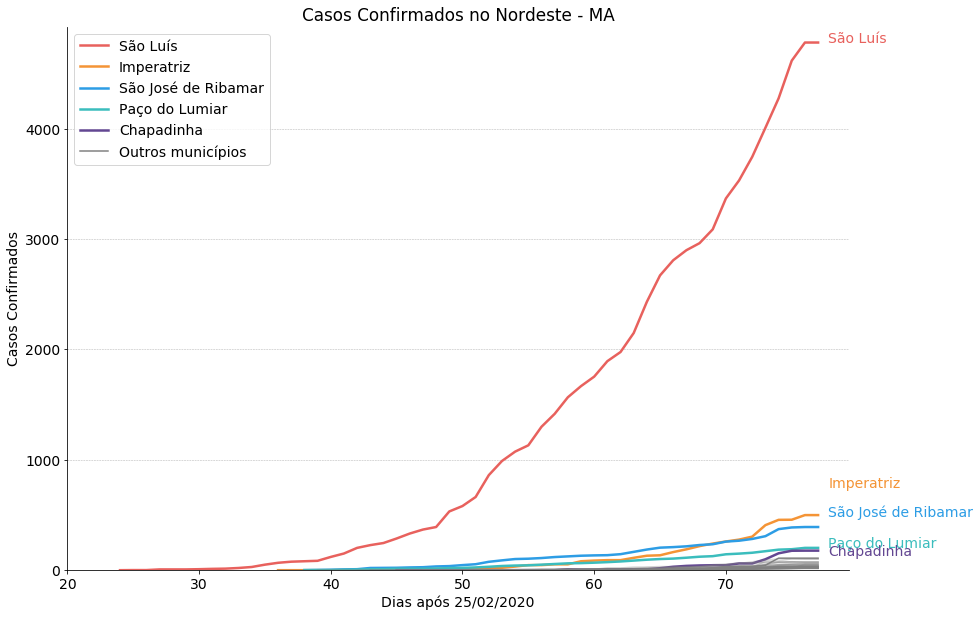

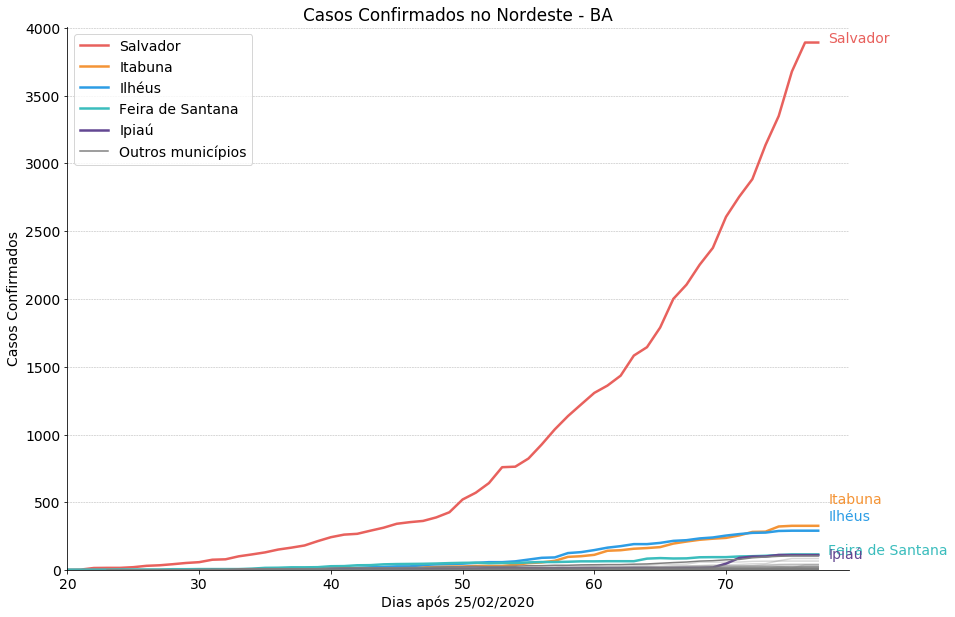

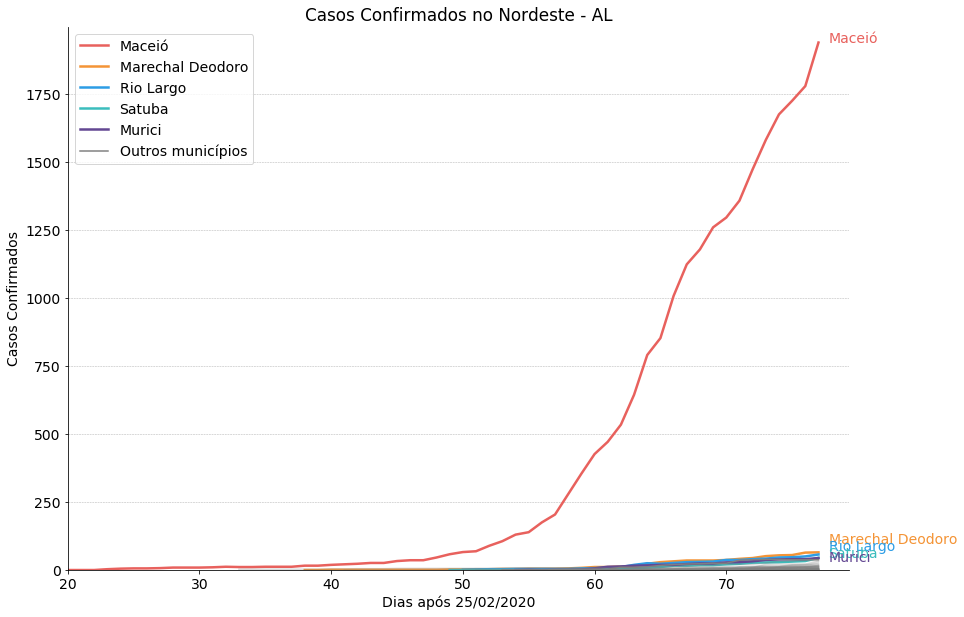

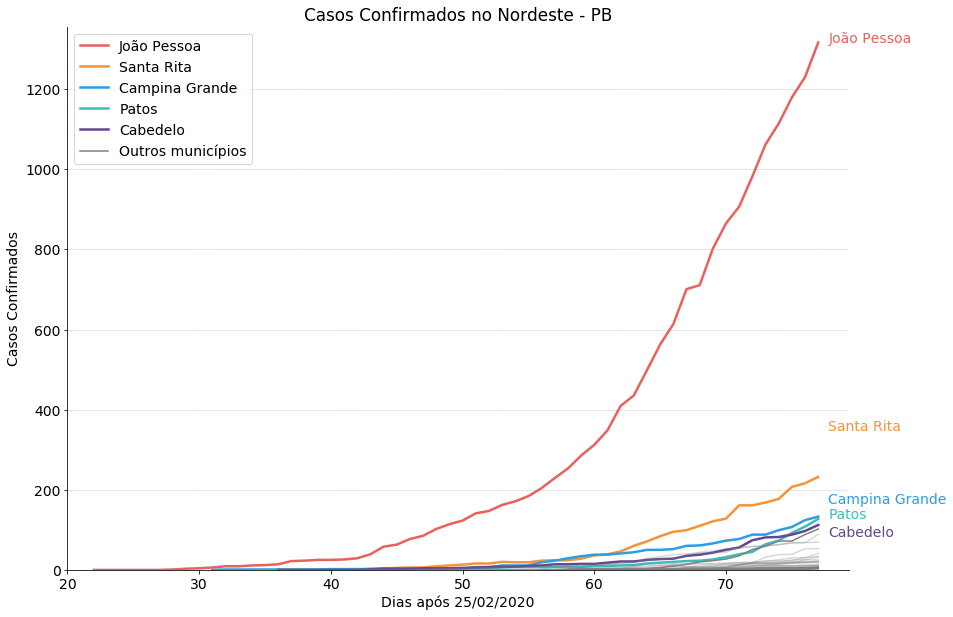

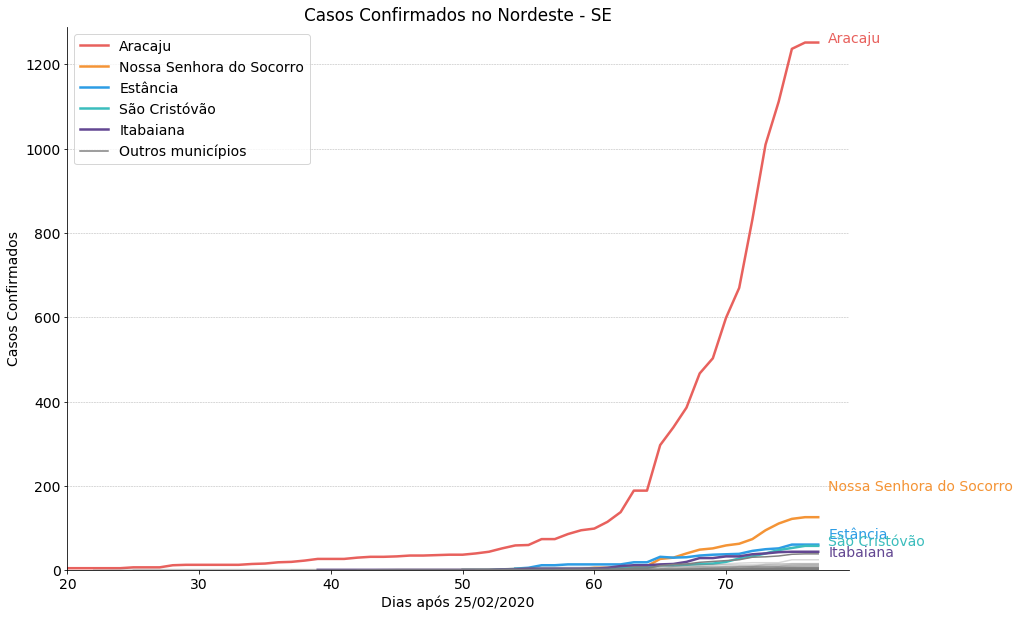

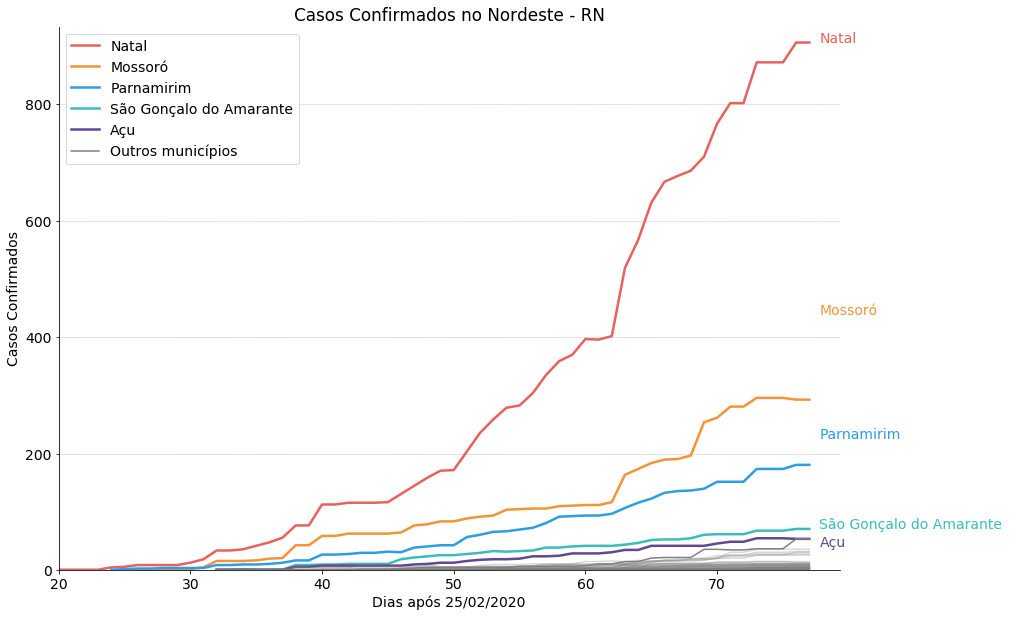

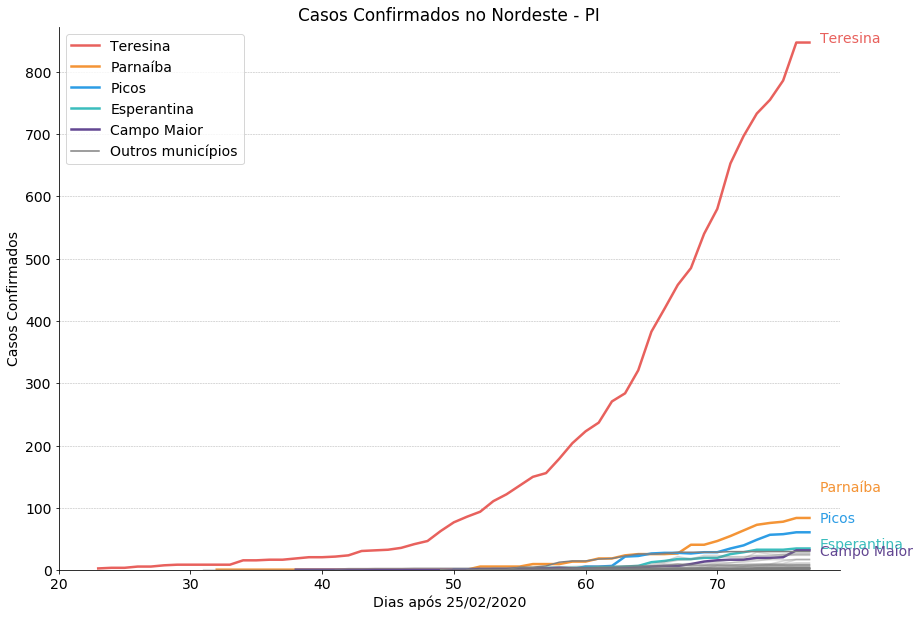

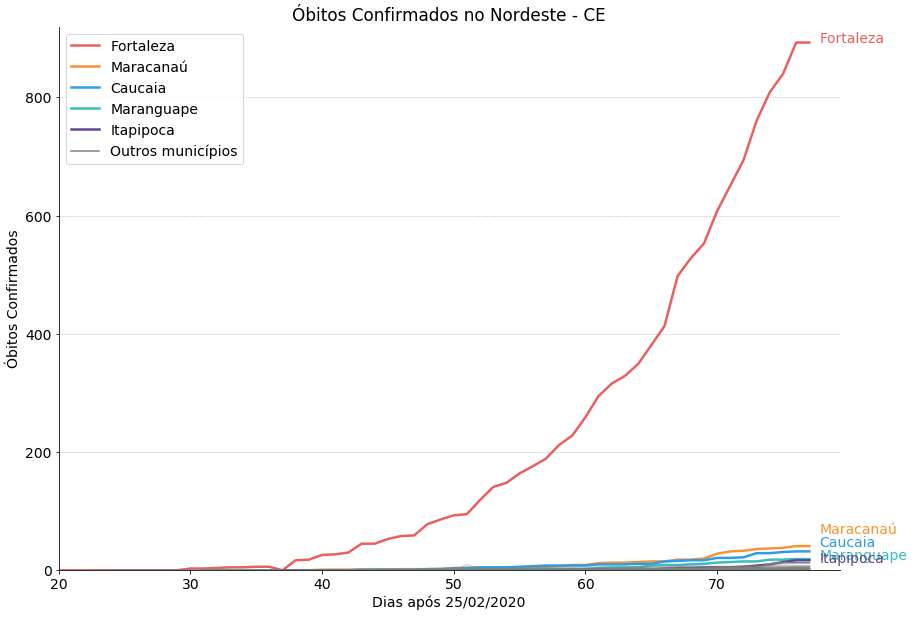

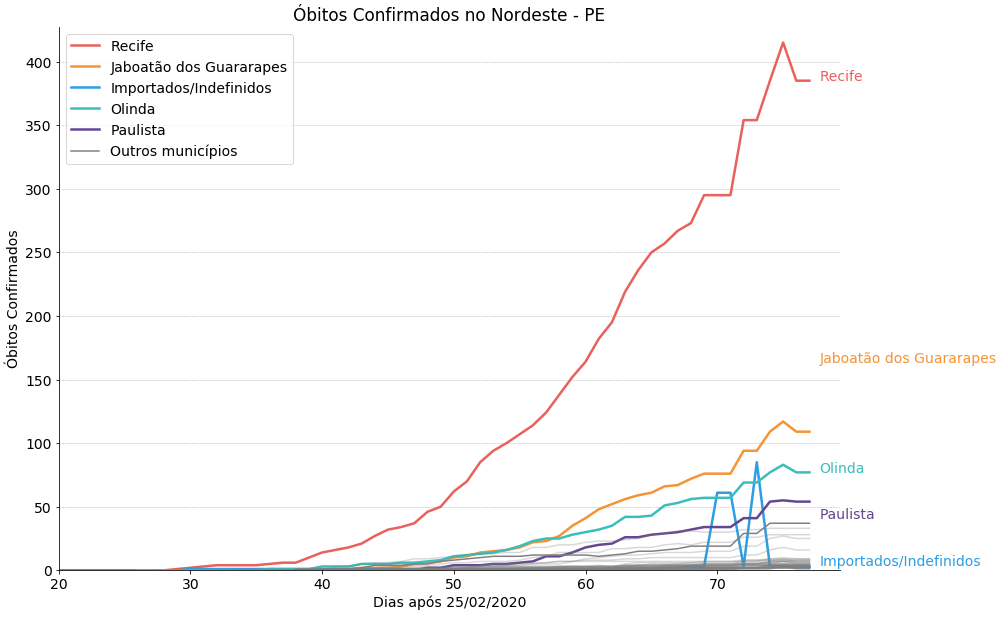

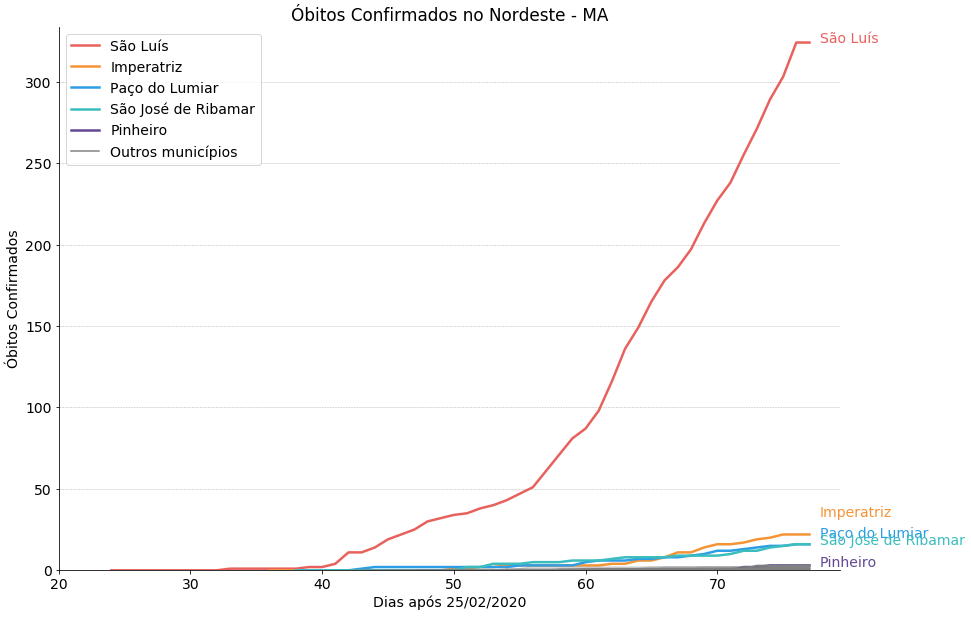

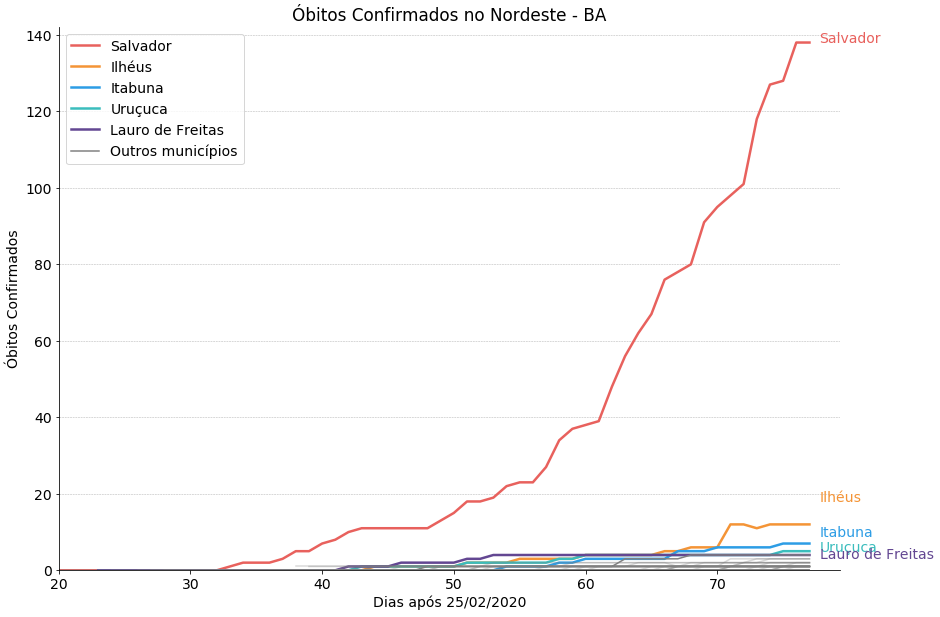

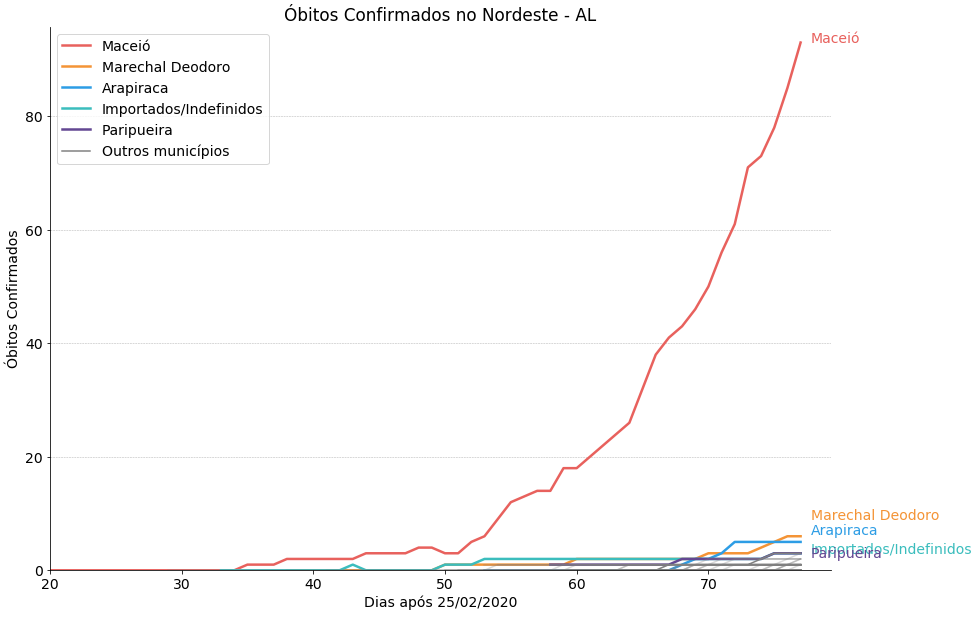

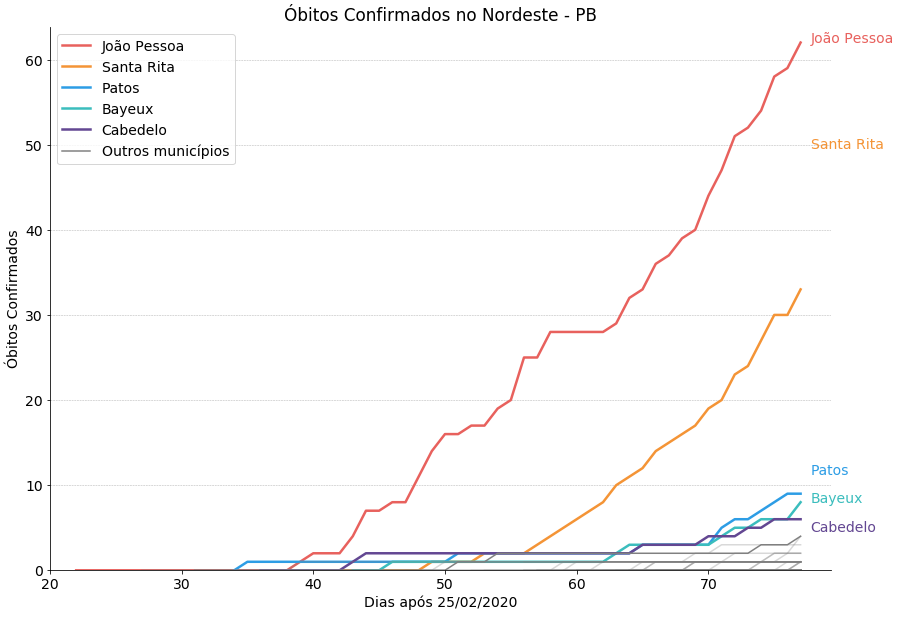

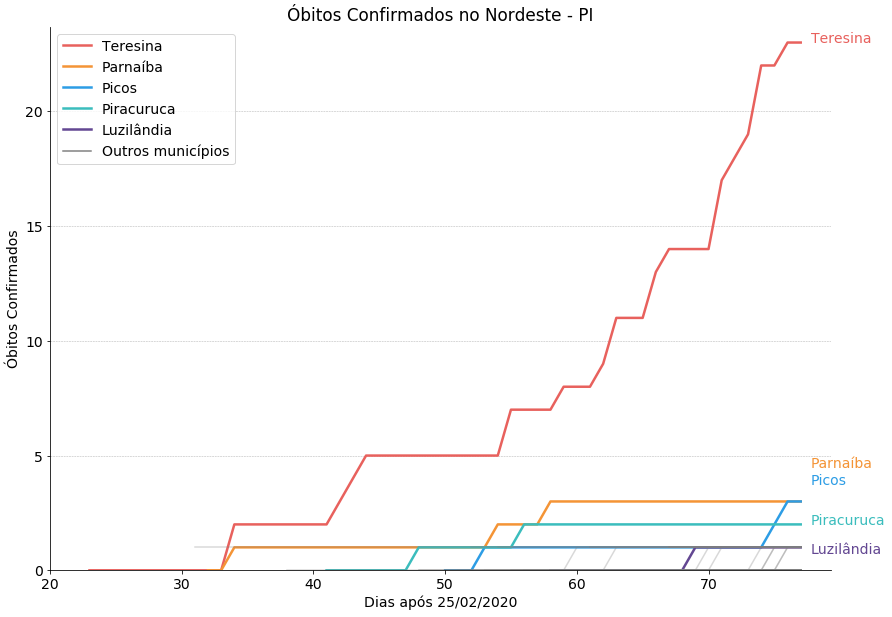

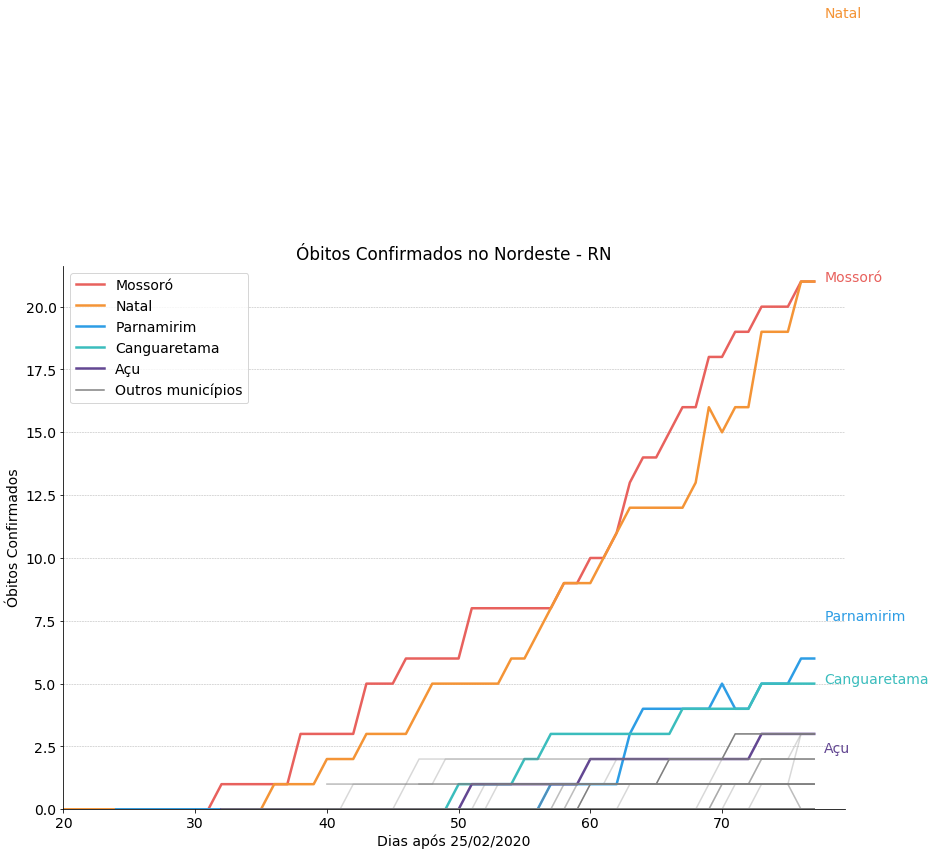

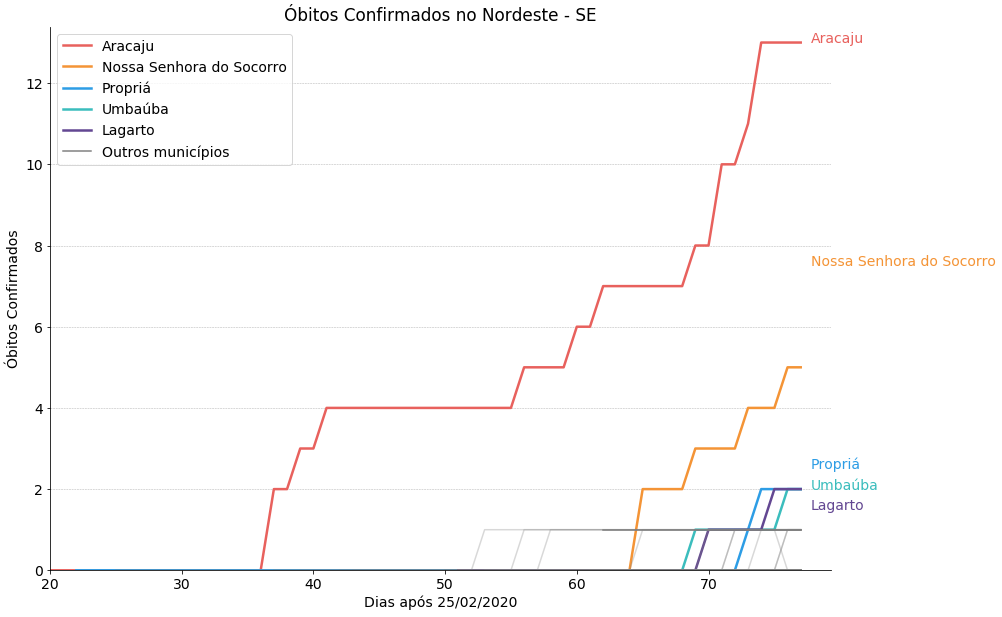

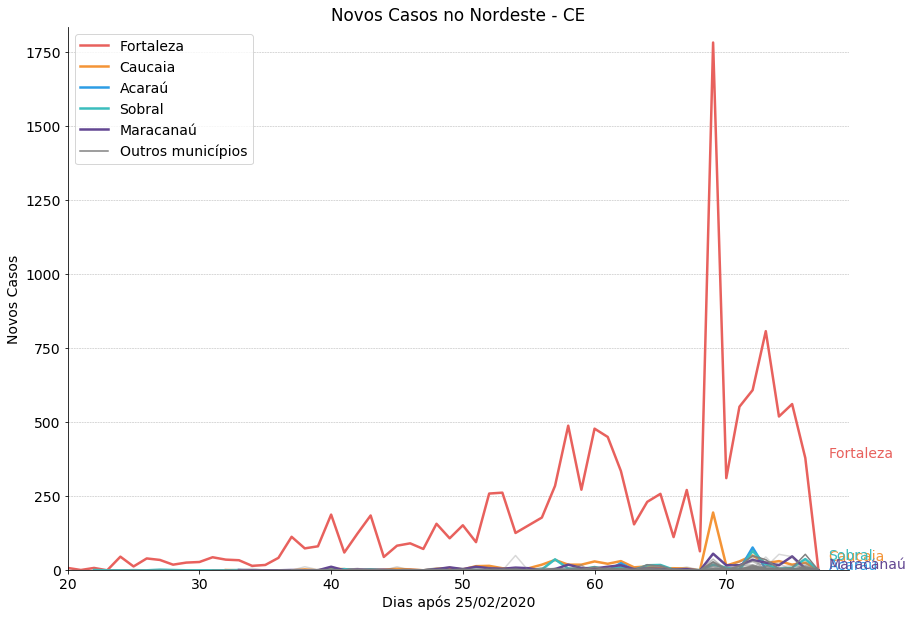

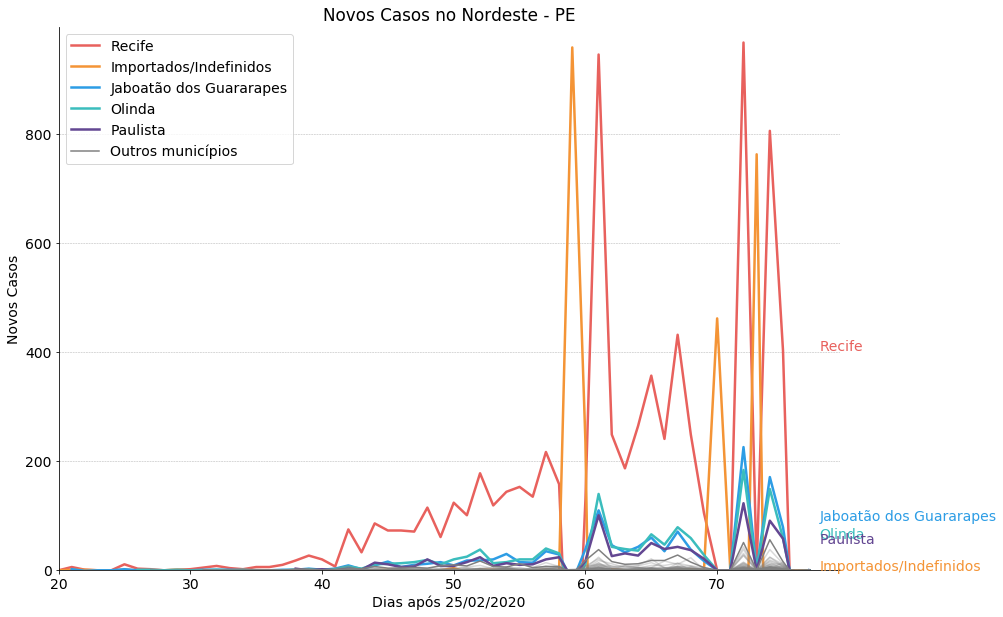

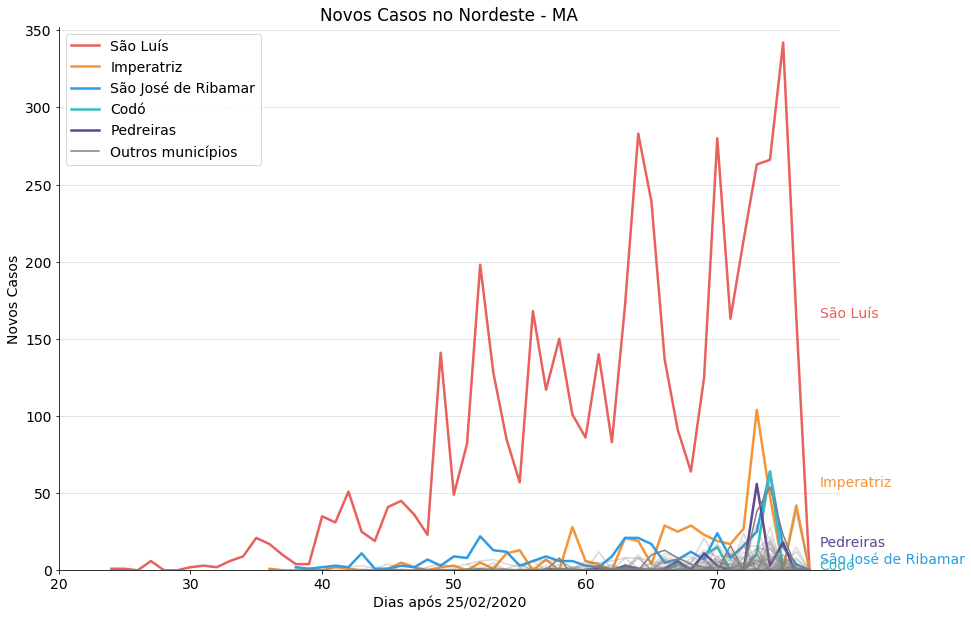

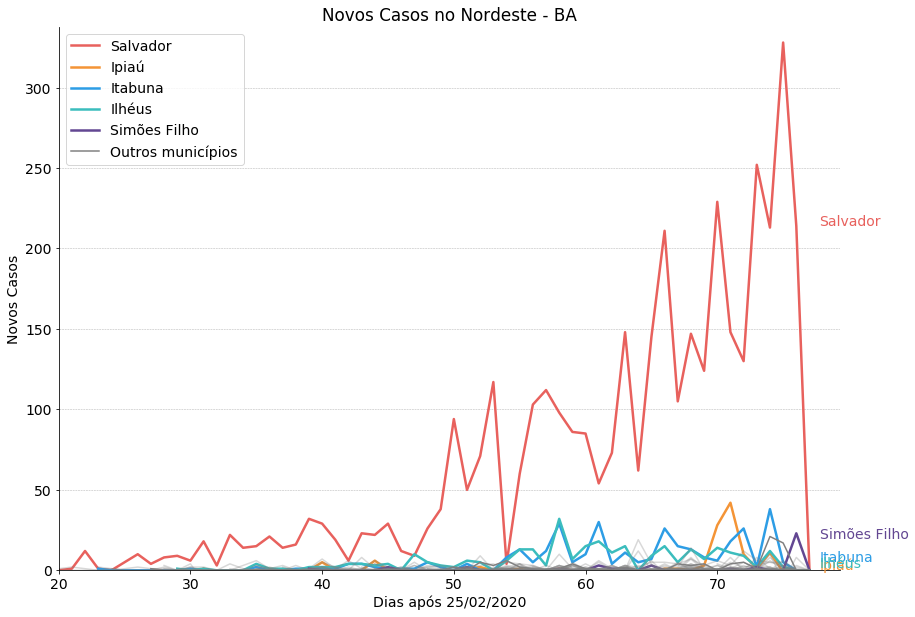

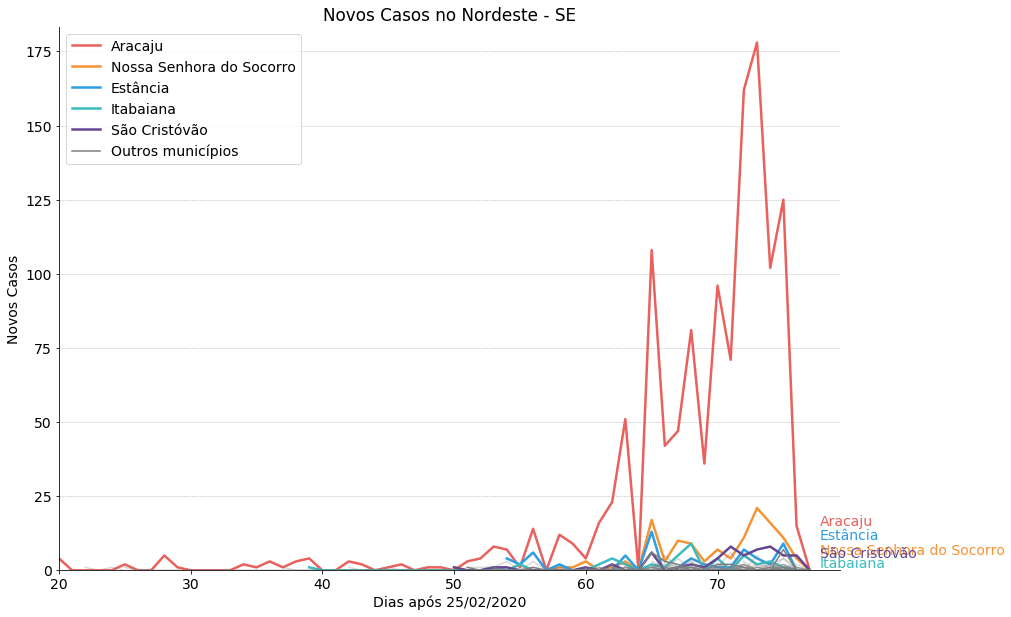

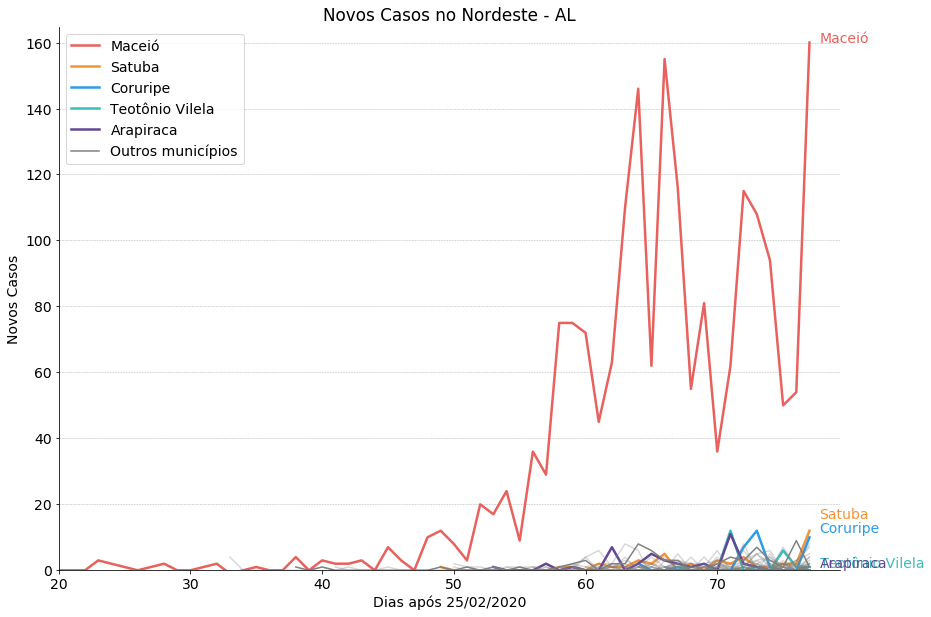

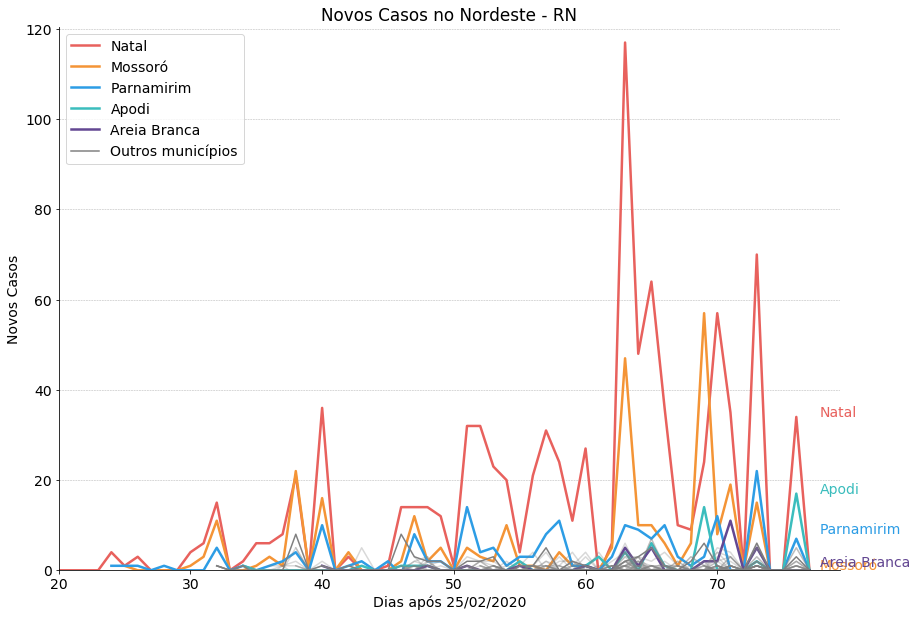

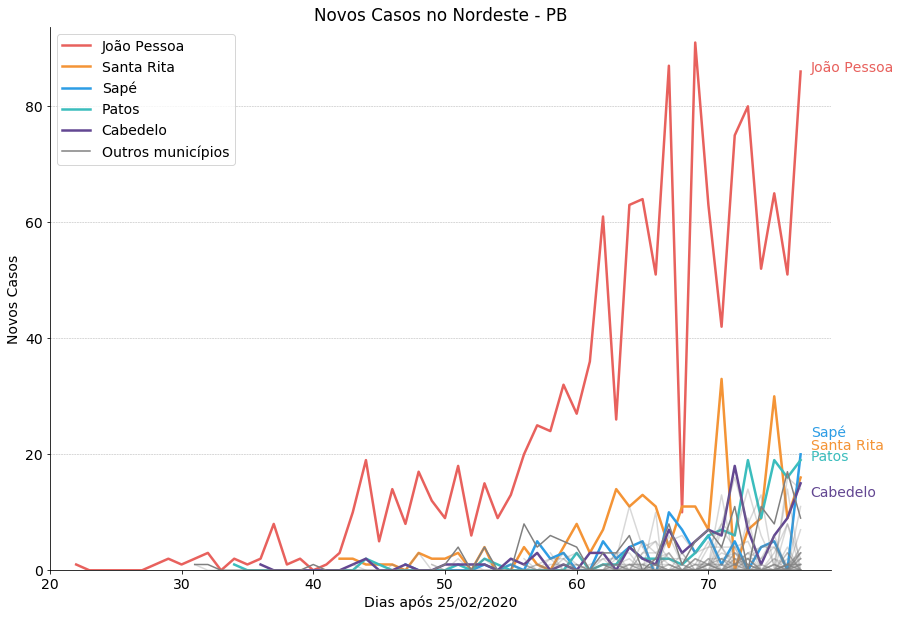

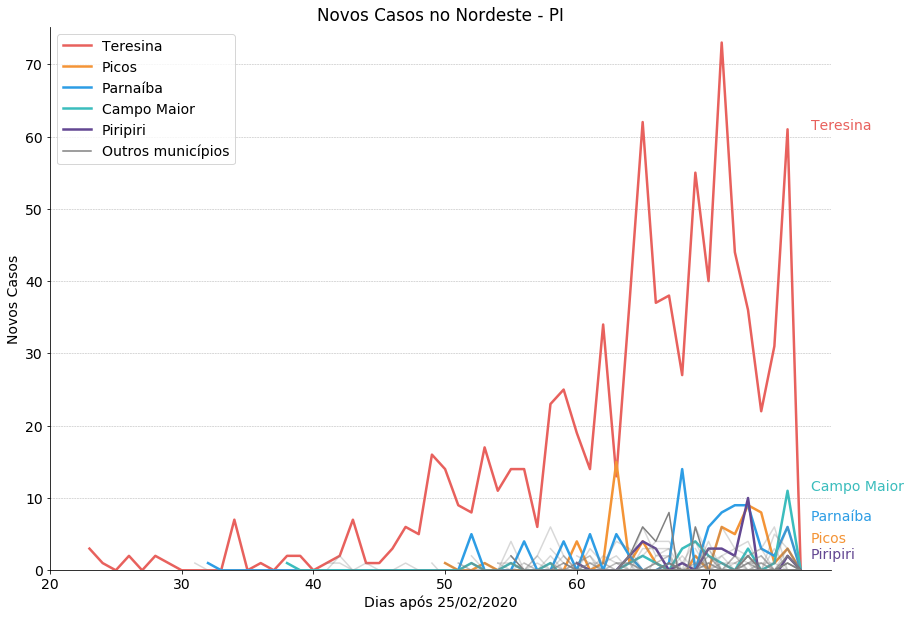

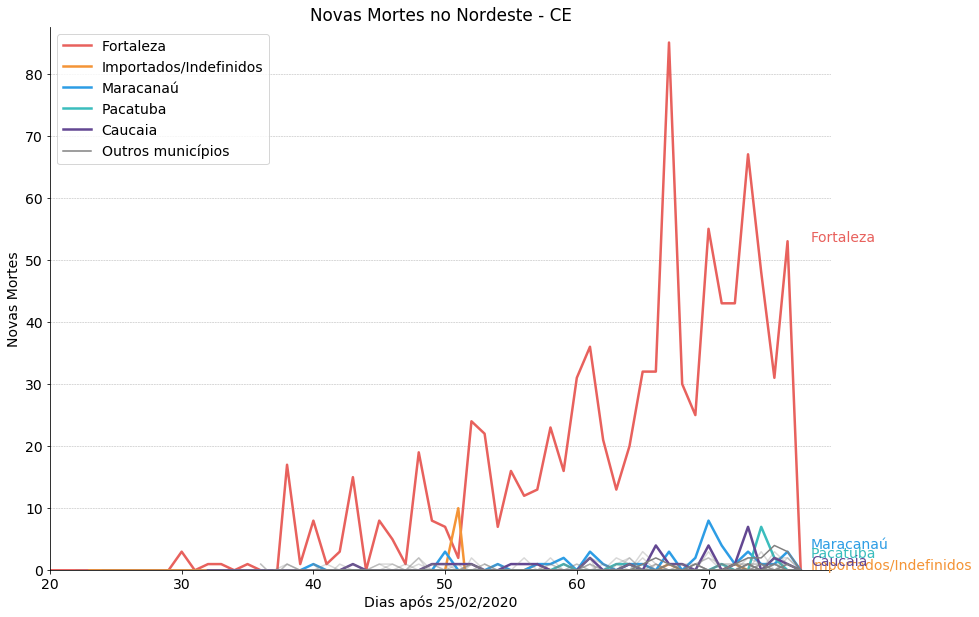

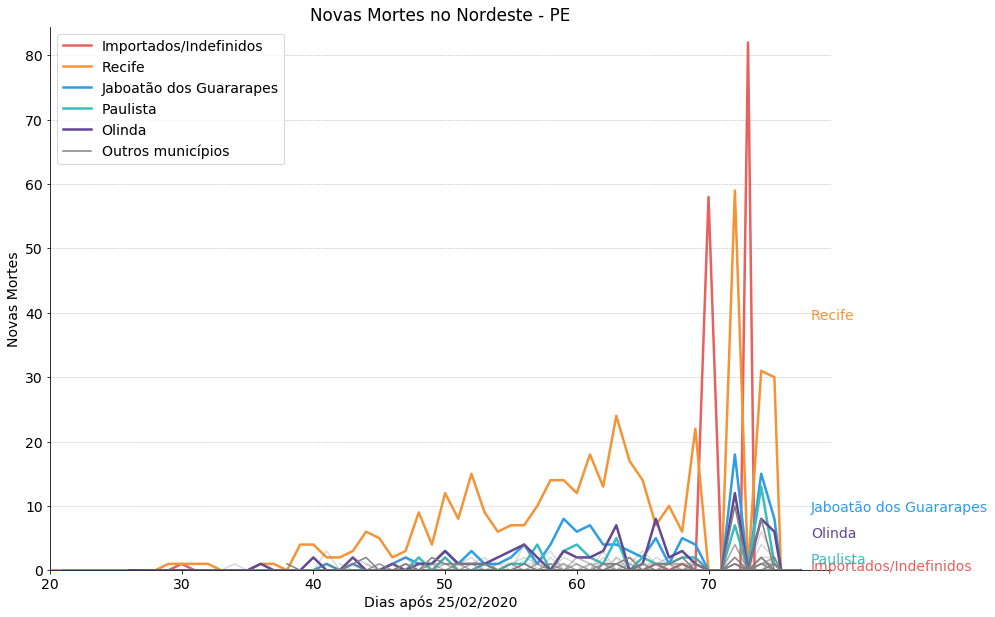

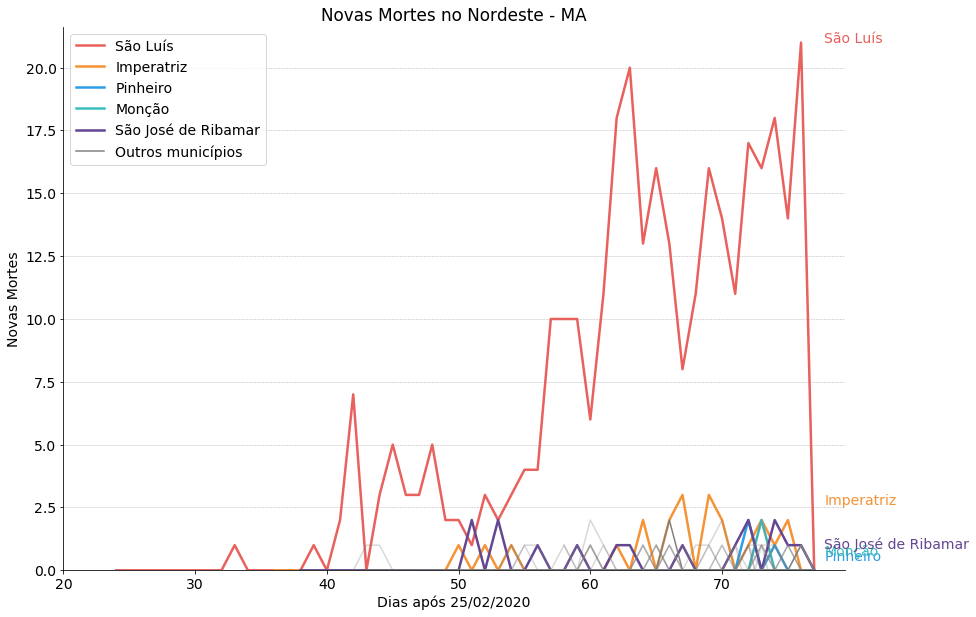

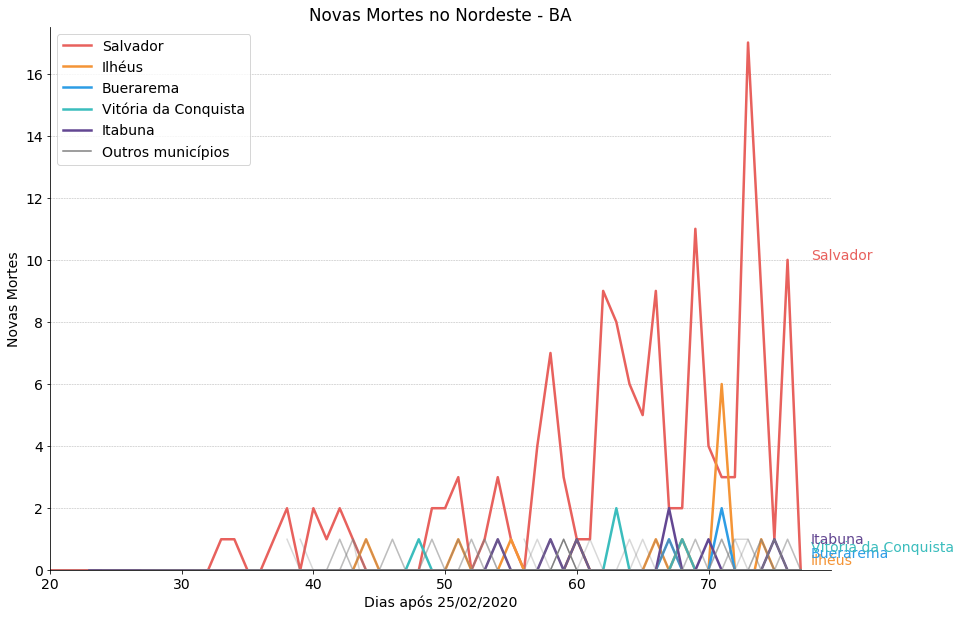

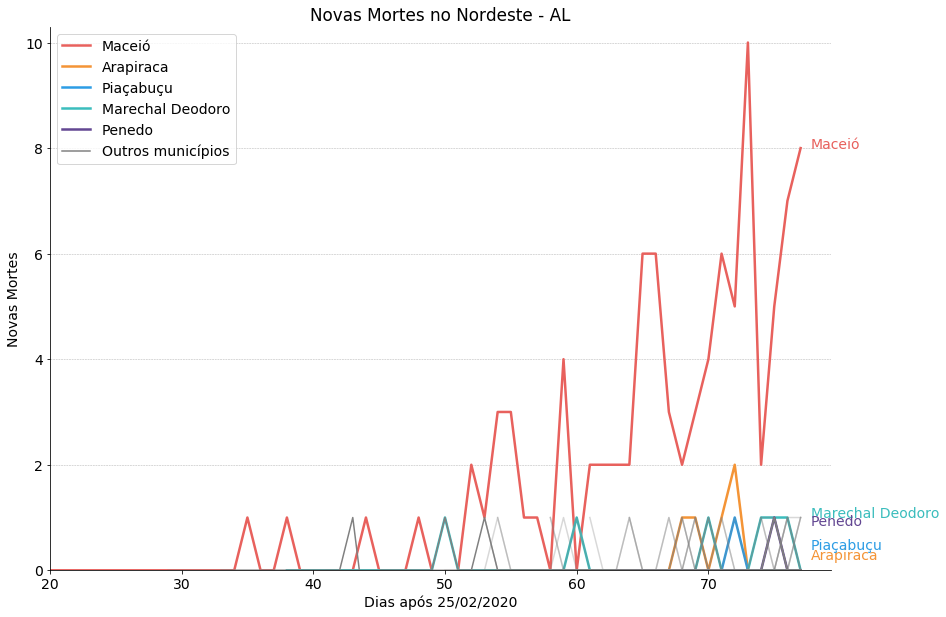

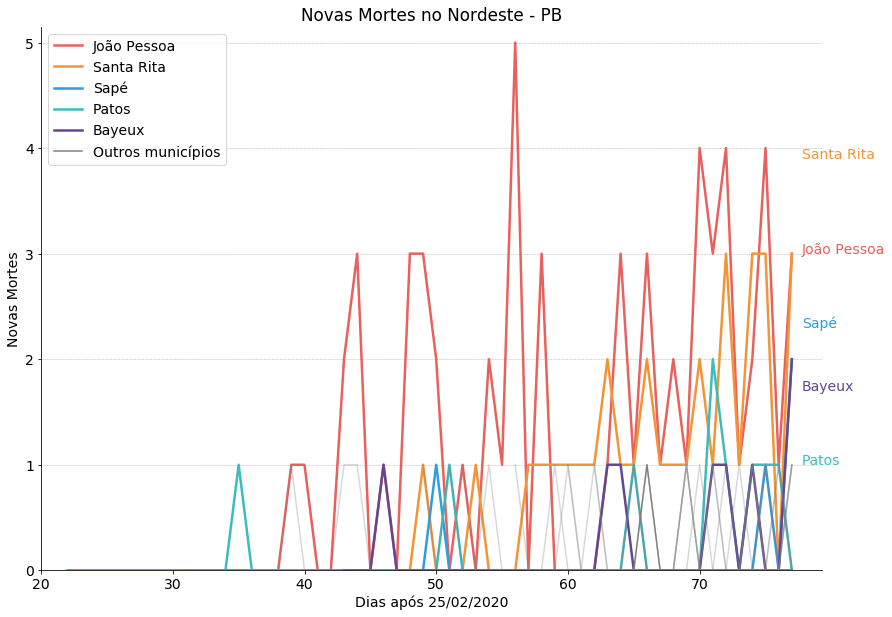

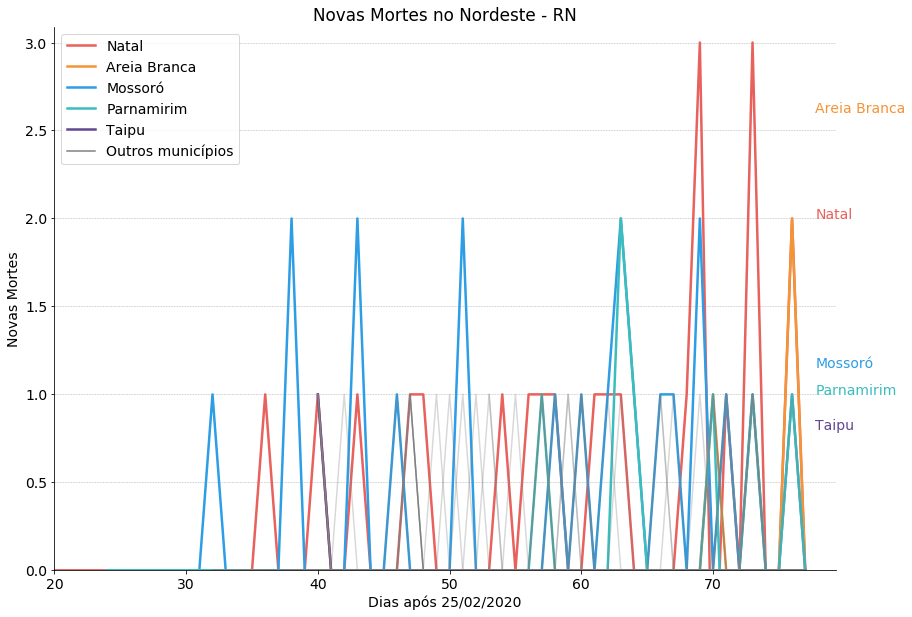

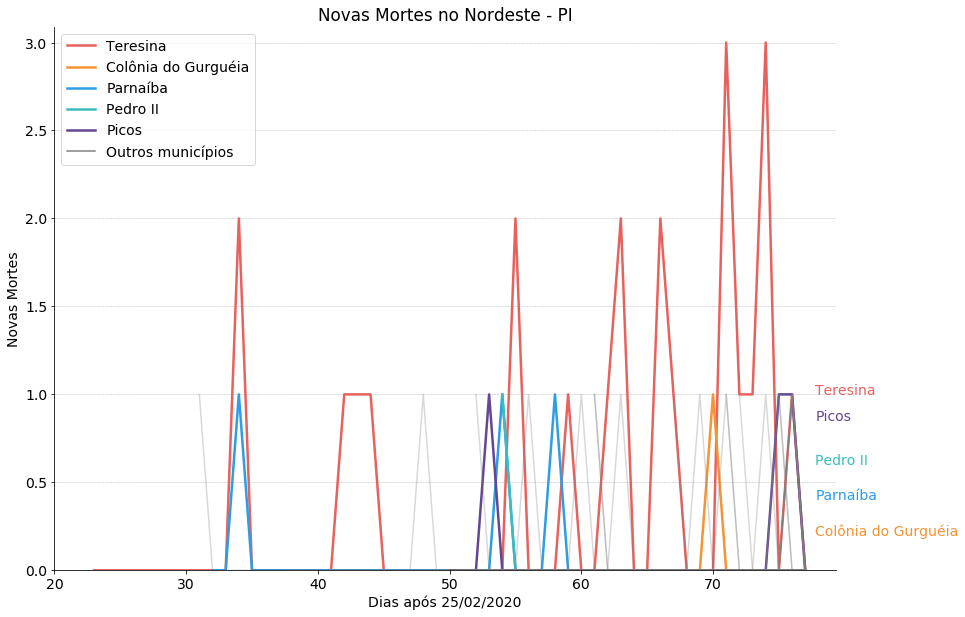

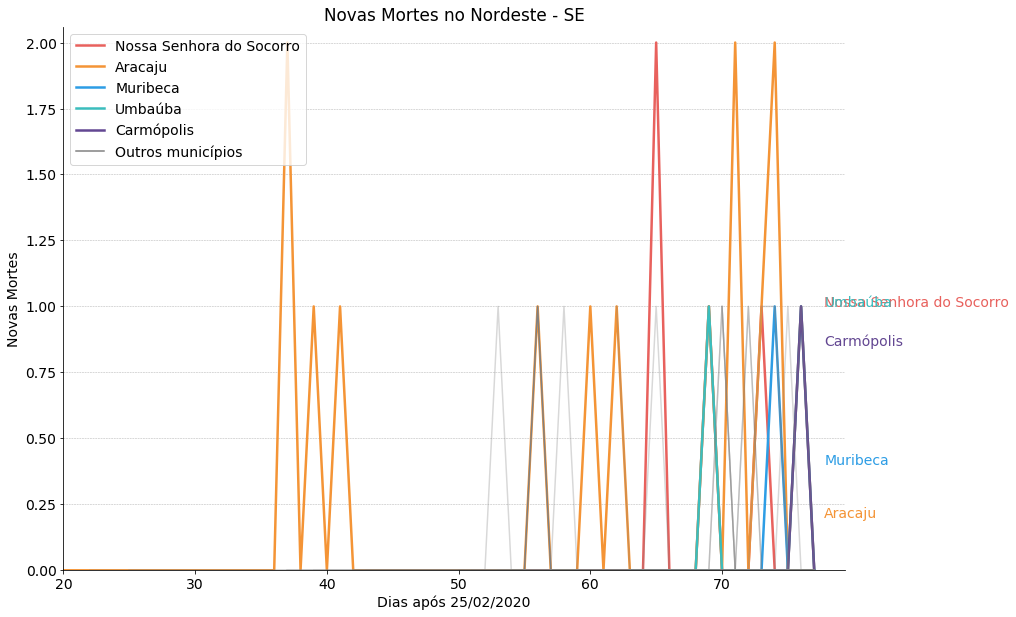

In [15]:
label = ["Cidade", "Código IBGE", "Estado", "População", "Dia", "Casos Confirmados", 
           "Óbitos Confirmados", "Novos Casos", "Novas Mortes"]

for f in range(5, 9) :
    estados_e = list(df_NE.sort_values(df_NE.columns[f], ascending = False)['state'].unique())
    
    for e in range(len(estados_e)) :
        x_max = 0
        y_max = 0 

        plt.rc('font', size = 14)
        plt.rcParams['figure.figsize'] = [14, 10]
        plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                        labelbottom = "on", left = "off", right = "off", labelleft = "on")

        plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)
        plt.gca().spines["top"].set_visible(False)    
        plt.gca().spines["right"].set_visible(False)
        plt.gca().get_xaxis().tick_bottom()    
        plt.gca().get_yaxis().tick_left()        

        cidades_c = list(df_NE.loc[df_NE['state'] == estados_e[e],
                                          :].sort_values(df_NE.columns[f], ascending = False)['city'].unique())
        ytab = [[0], [0], [0], [0], [0],
                [1, 1.5, 1.25, 1, .75], [1, 1.5, 1.25, 1, .75],
                [1, 1.3, 1.15, 1, .85], [1, 1.3, 1.15, 1, .85]]

        for c in range(len(cidades_c)) : 
            # Real data
            x = list(df_NE.loc[(df_NE['city'] == cidades_c[c]) & (df_NE['state'] == estados_e[e]), :].iloc[:, 4])
            y = list(df_NE.loc[(df_NE['city'] == cidades_c[c]) & (df_NE['state'] == estados_e[e]), :].iloc[:, f])

            if max(x) > x_max :
                x_max = max(x)
            if max(y) > y_max :
                y_max = max(y)            

            if (c > 5) & (c < 50) :
                plt.plot(x, y, marker = ' ', color = (.5, .5, .5, .3), lw = 1.5)
            elif c == 5 :
                plt.plot(x, y, marker = ' ', label = 'Outros municípios', color = 'gray', lw = 1.5)
            elif c < 5 :
                plt.plot(x, y, marker = ' ', label = cidades_c[c], color = color[c], lw = 2.5)
                if y[-1] > 0 :
                    plt.text(max(x) * 1.01, y[-1] * ytab[f][c], cidades_c[c], color = color[c], fontsize = 14)
                elif y[-2] > 0 :
                    plt.text(max(x) * 1.01, y[-2] * ytab[f][c], cidades_c[c], color = color[c], fontsize = 14)
                elif y[-3] > 0 :
                    plt.text(max(x) * 1.01, y[-3] * ytab[f][c], cidades_c[c], color = color[c], fontsize = 14)
                else :
                    plt.text(max(x) * 1.01, .2 * c, cidades_c[c], color = color[c], fontsize = 14)

            plt.xlim(20, x_max * 1.03)
            plt.ylim(0, y_max * 1.03) 

        plt.title(label[f] + " no Nordeste - " + estados_e[e])
        plt.legend(loc = 2)
        #plt.yscale('log')
        plt.xlabel("Dias após 25/02/2020")
        plt.ylabel(label[f])
        plt.savefig('Graphics/' + label[f] + ' ' + estados_e[e] +".png")
        plt.show()

In [11]:
df_NEh = df_NE.loc[(df_NE["is_last"] == True), :].drop(['date', 'is_last'], axis = 1)
df_NEh = df_NEh.loc[(df_NEh["city"] != 'Importados/Indefinidos'), :]
df_NEh['city_ibge_code'] = df_NEh['city_ibge_code'].astype(int).astype(str)

In [ ]:
m = folium.Map(
    name = 'COVID19 Nordeste',
    width = 800, height = 600,
    location = [-7, -36.75], # centro paraiba 
    zoom_start = 8,
    min_zoom = 6,
    max_zoom = 18,
    zoom_control = False,
    tiles = 'OpenStreetMap'#'cartodbpositron'
)

m.choropleth(
    geo_data = geo,
    name = 'Casos Confirmados',
    data = df_NEh,
    columns = ['city_ibge_code', 'confirmed'],
    key_on = 'feature.properties.id',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.2,
    line_color = '#634792',
    line_opacity = 0.3,
    legend_name = 'Casos Confirmados',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 10000, 100000]
)

m.choropleth(
    geo_data = geo,
    name = 'Mortes Confirmadas',
    data = df_NEh,
    columns = ['city_ibge_code', 'deaths'],
    key_on = 'feature.properties.id',
    fill_color = 'Reds',
    fill_opacity = 0.7,
    nan_fill_color = 'gray',
    nan_fill_opacity = 0.2,
    line_color = '#634792',
    line_opacity = 0.3,
    legend_name = 'Óbitos Confirmados',
    legend_fontsize = '14',
    bins = [0, 1, 10, 100, 1000, 10000],
    show = False
)

folium.LayerControl(name = 'COVID19 Nordeste', position = 'topright').add_to(m)

m.save('mapa.html')
m